# Simple neural network trained on MNIST (Modified National Institute of Standards and Technology)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow_datasets as tfds


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
len(x_train)

60000

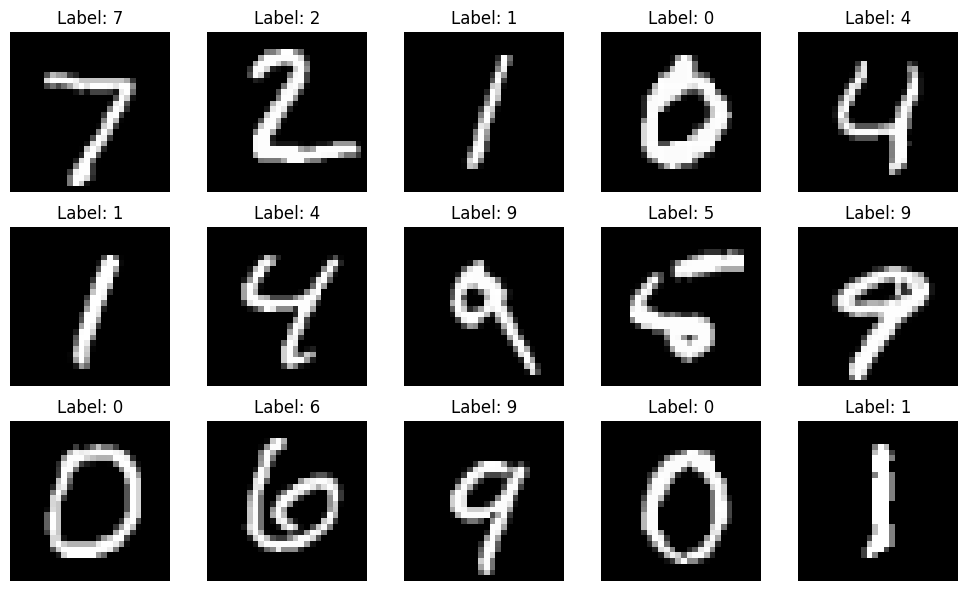

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in range(15):
    img= x_test[i]
    label = y_test[i]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/Users/mitevzd/Downloads/.env3.9/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8803 - loss: 0.4266 - val_accuracy: 0.9583 - val_loss: 0.1400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9618 - loss: 0.1275 - val_accuracy: 0.9681 - val_loss: 0.1051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9758 - loss: 0.0802 - val_accuracy: 0.9744 - val_loss: 0.0849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9831 - loss: 0.0578 - val_accuracy: 0.9749 - val_loss: 0.0844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9851 - loss: 0.0460 - val_accuracy: 0.9755 - val_loss: 0.0778
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0338 - val_accuracy: 0.9757 - val_loss: 0.0796
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9753 - val_loss: 0.0853
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9932 - loss: 0.0224 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


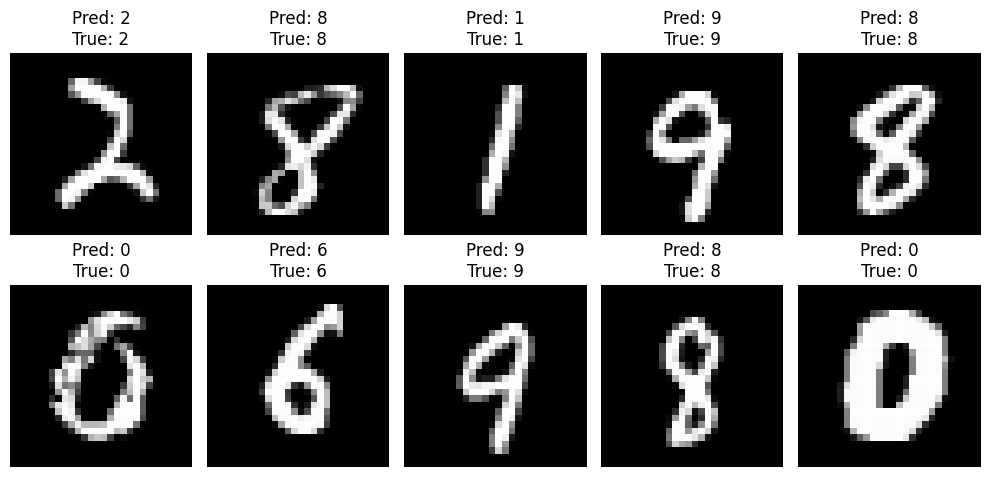

In [8]:
# Select some random images from the test set
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {predicted_labels[i]}\nTrue: {sample_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Finetuning 

In [9]:
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 102
EPOCHS = 10

In [10]:
# Data preprocessing: resize and normalize images
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.efficientnet_v2.preprocess_input(image)
    return image, label

# Data augmentation for the training set
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    return image, label


In [11]:
# Load Oxford Flowers 102 dataset from TFDS in supervised mode
splits = tfds.Split.ALL
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'oxford_flowers102',
    split=['train', 'validation', 'test'],
    with_info=True,
    as_supervised=True
)

In [12]:
# Prepare the training dataset
ds_train = ds_train.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Prepare the validation dataset
ds_val = ds_val.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
ds_val = ds_val.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Prepare the test dataset
ds_test = ds_test.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [13]:
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(ds_train,
                    validation_data=ds_val,
                    epochs=10)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test accuracy: {test_acc:.2f}')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,049,974 (23.08 MB)

 Trainable params: 130,662 (510.40 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

Epoch 1/10


2025-03-06 22:54:21.304522: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 628ms/step - accuracy: 0.0271 - loss: 4.6292 - val_accuracy: 0.3657 - val_loss: 3.6762
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 543ms/step - accuracy: 0.4629 - loss: 3.3349 - val_accuracy: 0.6245 - val_loss: 2.8383
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 569ms/step - accuracy: 0.7400 - loss: 2.3845 - val_accuracy: 0.7314 - val_loss: 2.2634
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 613ms/step - accuracy: 0.8393 - loss: 1.7807 - val_accuracy: 0.7755 - val_loss: 1.8674
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 568ms/step - accuracy: 0.9087 - loss: 1.3706 - val_accuracy: 0.7961 - val_loss: 1.5953
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 614ms/step - accuracy: 0.9178 - loss: 1.0359 - val_accuracy: 0.8186 - val_loss: 1.4040
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.9508 - loss: 0.8771 - val_accuracy: 0.8245 - val_loss: 1.2597
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 666ms/step - accuracy: 0.9717 - loss: 0.7116 - val_accuracy: 0.841

In [19]:
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
for layer in base_model.layers:
    if (layer.name.startswith('stem') or 
        layer.name.startswith('block1') or 
        layer.name.startswith('block2') or 
        layer.name.startswith('block3')):
        layer.trainable = False
    else:
        layer.trainable = True
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,049,974 (23.08 MB)

 Trainable params: 5,795,062 (22.11 MB)

 Non-trainable params: 254,912 (995.75 KB)

In [21]:
history = model.fit(ds_train,
                    validation_data=ds_val,
                    epochs=6)

Epoch 1/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.1591 - loss: 4.1740 - val_accuracy: 0.7255 - val_loss: 1.5996
Epoch 2/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8709 - loss: 1.0392 - val_accuracy: 0.8637 - val_loss: 0.6301
Epoch 3/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9680 - loss: 0.2431 - val_accuracy: 0.8980 - val_loss: 0.4345
Epoch 4/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9912 - loss: 0.0787 - val_accuracy: 0.8990 - val_loss: 0.3686
Epoch 5/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9879 - loss: 0.0492 - val_accuracy: 0.9196 - val_loss: 0.3177
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9987 - loss: 0.0243 - val_accuracy: 0.9088 - val_loss: 0.3439


In [22]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test accuracy: {test_acc:.2f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 48s 250ms/step - accuracy: 0.8819 - loss: 0.4619
Test accuracy: 0.88
